<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DDDM/blob/main/COIN/neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How deep

Let's reuse our pseudorandom digit data from last module.

In [ ]:
import numpy as np
import pandas as pd
from io import StringIO
from random import randint

In [ ]:
text = '''g b g b w b b w b b w b g b g
w w g w w b w w b w w b w w g
g b b w w b g b g b w w b b g
g b g w w b g b g w w b g b g
b w g b w b g b b w w b w w g
g b g b w w g b g w w b g b g
g b g b w w b b g b w b g b g
g b b w w b w w b w w b w w g
g b g b w b g b g b w b g b g
g b g b w b g b g w w b g b g
'''

template = pd.read_csv(StringIO(text), sep=' ', header = None).replace({'b': 0.99, 'g': 0.90, 'w': 0.01})

r, c = 5, 3
dim = r * c

Create a dataset.

In [ ]:
n = 5000 # how many digits to generate
images = []
labels = []
for i in range(n):
    d = randint(0, 9) # pick a digit
    # generate the 15 pixels into an array
    i = np.asarray(1 * (np.random.rand(dim) < template.iloc[d]))
    images.append(i.reshape(r, c)) # keep it as a rectangle this time
    labels.append(d)

In [ ]:
images[0]

array([[1, 1, 1],
       [1, 0, 0],
       [1, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [ ]:
labels[:3]

[6, 4, 1]

Split this into a *training* set and a *testing* set.

In [ ]:
div = round(0.7 * n)
training = images[:div]
X = np.array(training)
y = np.array(labels[:div]).T # labels as a column vector

Check the balance.

In [ ]:
ls, cs = np.unique(y, return_counts = True)
for (l, k) in zip(ls, cs):
    print(f'Training with {k} images with label {l}')

Training with 362 images with label 0
Training with 364 images with label 1
Training with 354 images with label 2
Training with 368 images with label 3
Training with 358 images with label 4
Training with 327 images with label 5
Training with 341 images with label 6
Training with 342 images with label 7
Training with 340 images with label 8
Training with 344 images with label 9


The rest is the testing set, then, that should also be balanced.

In [ ]:
testing = images[div:] # the rest of it
testX = np.array(testing)
testy = np.array(labels[div:]).T
ls, cs = np.unique(testy, return_counts = True)
for (l, k) in zip(ls, cs):
    print(f'Testing with {k} images with label {l}')

Testing with 168 images with label 0
Testing with 142 images with label 1
Testing with 138 images with label 2
Testing with 153 images with label 3
Testing with 141 images with label 4
Testing with 159 images with label 5
Testing with 124 images with label 6
Testing with 158 images with label 7
Testing with 146 images with label 8
Testing with 171 images with label 9


[ebook](https://mcgill.on.worldcat.org/oclc/1226354941)



We build a neural network by stacking **layers** with compatible input and output dimensions, each with an [activation function](https://keras.io/api/layers/activations/).




In [ ]:
# if you do this on your computer, also install TensorFlow
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [ ]:
m = Sequential()
m.add(Conv2D(5, (3, 3), input_shape=(5, 3, 1), padding = 'valid')) # input layer that looks at 3x3 neighborhoods (we have technically five of these at different heights, not all complete)
m.add(Flatten()) # flattening middle layer
# since we needed four bits with just the perceptrons, this thing is unlikely to do with less
m.add(Dense(10, activation = 'softmax')) # one-hot output layer

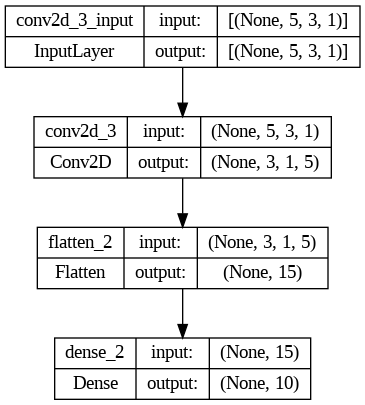

In [ ]:
tf.keras.utils.plot_model(m, show_shapes=True)

What did we just build?

In [ ]:
!pip install visualkeras

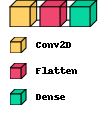

In [ ]:
import visualkeras
visualkeras.layered_view(m, legend = True)

We need to pick

1.  an [optimizer](https://keras.io/optimizers/) to determine the logic of the training process (with elegant stuff when necesary),
2.  a [loss function](https://keras.io/losses/),
3.  and performance measures to report.

In [ ]:
m.compile(optimizer = 'adam', # an algorithm to use to carry out the model training
          loss = 'categorical_crossentropy', # an error measurement to minimize during the training process
          metrics = ['accuracy']) # the performance measures we want reported

In [ ]:
import keras.utils
ty = keras.utils.to_categorical(y, num_classes = 10) # we have ten digits / classes
print(y[:5])
print(ty[:10]) # one-hot encoding

[6 4 1 6 7]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
m.fit(X, ty, epochs = 10)

Epoch 1/10
110/110 [==============================] - 2s 3ms/step - loss: 2.0897 - accuracy: 0.3134
Epoch 2/10
110/110 [==============================] - 0s 4ms/step - loss: 1.7707 - accuracy: 0.4857
Epoch 3/10
110/110 [==============================] - 0s 3ms/step - loss: 1.4764 - accuracy: 0.6829
Epoch 4/10
110/110 [==============================] - 0s 4ms/step - loss: 1.2114 - accuracy: 0.8334
Epoch 5/10
110/110 [==============================] - 1s 6ms/step - loss: 0.9893 - accuracy: 0.8623
Epoch 6/10
110/110 [==============================] - 1s 5ms/step - loss: 0.8100 - accuracy: 0.9163
Epoch 7/10
110/110 [==============================] - 1s 6ms/step - loss: 0.6671 - accuracy: 0.9234
Epoch 8/10
110/110 [==============================] - 1s 5ms/step - loss: 0.5521 - accuracy: 0.9443
Epoch 9/10
110/110 [==============================] - 1s 5ms/step - loss: 0.4609 - accuracy: 0.9571
Epoch 10/10
110/110 [==============================] - 1s 5ms/step - loss: 0.3886 - accuracy: 0.9634

Seems to do better in terms of accuracy than our simple stack of perceptrons 😀

For evaluation of a neural network, we should **cross-validate** so that we do not just rely on one training-testing split.

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
estimator = KerasClassifier(m, epochs = 5, batch_size = 5) # more epochs -> more training -> slower

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 3, shuffle = True) # the more splits, the longer this takes
results = cross_val_score(estimator, X, ty, cv = kfold)

Epoch 1/5
467/467 [==============================] - 3s 6ms/step - loss: 0.2865 - accuracy: 0.9653
Epoch 2/5
467/467 [==============================] - 4s 8ms/step - loss: 0.1996 - accuracy: 0.9704
Epoch 3/5
467/467 [==============================] - 2s 5ms/step - loss: 0.1596 - accuracy: 0.9717
Epoch 4/5
467/467 [==============================] - 3s 6ms/step - loss: 0.1369 - accuracy: 0.9721
Epoch 5/5
234/234 [==============================] - 1s 4ms/step
Epoch 1/5
467/467 [==============================] - 4s 7ms/step - loss: 0.2772 - accuracy: 0.9687
Epoch 2/5
467/467 [==============================] - 2s 4ms/step - loss: 0.1886 - accuracy: 0.9739
Epoch 3/5
467/467 [==============================] - 2s 4ms/step - loss: 0.1486 - accuracy: 0.9751
Epoch 4/5
467/467 [==============================] - 2s 5ms/step - loss: 0.1269 - accuracy: 0.9769
Epoch 5/5
234/234 [==============================] - 1s 2ms/step
Epoch 1/5
467/467 [==============================] - 2s 3ms/step - loss: 0.280

We can now try it out with whatever images we like.

In [ ]:
input = np.matrix([ [1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1] ])
print(input)
print(input.shape)
input = np.expand_dims(input, axis = 0) # need to make it Conv2D compatible
input = np.expand_dims(input, axis = -1)
print(input.shape)
output = m.predict(input)
print(output)

[[1 1 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]
(5, 3)
(1, 5, 3, 1)
1/1 [==============================] - 0s 25ms/step
[[8.24123737e-04 1.02031045e-01 2.28545774e-04 1.93726905e-02
  5.30131510e-04 5.66486742e-05 6.56189513e-06 8.71636510e-01
  4.25333303e-04 4.88851918e-03]]


What is that output supposed to mean? That is the one-hot encoding for 0, 1, ..., 8, 9

In [ ]:
output[0].argmax() # find out the index

7

Let's make it so that we see the images and the labels that the model **predicts** for them

1/1 [==============================] - 0s 73ms/step


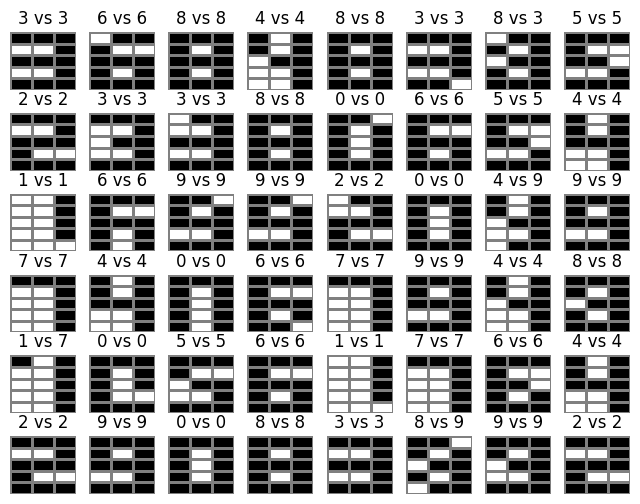

In [ ]:
def fix(input): # need to make it Conv2D compatible
  input = np.matrix(input)
  input = np.expand_dims(input, axis = 0)
  input = np.expand_dims(input, axis = -1)
  return input

def interpret(output):
  return output[0].argmax()

w = 8 # how many images side by side
h = 6 # how many rows of images

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormap

f, a = plt.subplots(h, w, figsize = (w, h), dpi = 100)
plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = None, hspace = 0.4)
for row in range(h):
  for col in range(w):
    d = randint(0, 9) # pick a digit
    pixels = (1 * (np.random.rand(dim) < template.iloc[d])) # generate the pixels
    img = pixels.values.reshape(r, c) # make it into a shape to draw
    i = fix(np.asarray(pixels).reshape(r, c))
    o = interpret(m.predict(i)) # ask the model for the output
    a[row, col].pcolormesh(img, edgecolors = 'gray', cmap = cm.Greys)
    a[row, col].set_title(f'{d} vs {o}')
    a[row, col].axis('off')
    a[row, col].invert_yaxis()